In [1]:
pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, desc

In [3]:
spark = SparkSession.builder \
    .appName("Big Data Analysis Internship Task") \
    .getOrCreate()

In [5]:
df = spark.read.csv("/content/Walmart_Sales.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- Store: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: double (nullable = true)
 |-- Holiday_Flag: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- CPI: double (nullable = true)
 |-- Unemployment: double (nullable = true)

+-----+----------+------------+------------+-----------+----------+-----------+------------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+-----+----------+------------+------------+-----------+----------+-----------+------------+
|    1|05-02-2010|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|
|    1|12-02-2010|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|
|    1|19-02-2010|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|
|    1|26-02-2010|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|
|    1|05-03-201

In [6]:
df.describe().show()  # summary statistics
df.columns            # list of columns
df.count()            # number of rows
df.dtypes             # data types

+-------+------------------+----------+------------------+-------------------+------------------+-------------------+-----------------+------------------+
|summary|             Store|      Date|      Weekly_Sales|       Holiday_Flag|       Temperature|         Fuel_Price|              CPI|      Unemployment|
+-------+------------------+----------+------------------+-------------------+------------------+-------------------+-----------------+------------------+
|  count|              6435|      6435|              6435|               6435|              6435|               6435|             6435|              6435|
|   mean|              23.0|      NULL|1046964.8775617732|0.06993006993006994| 60.66378243978229|  3.358606837606832|171.5783938487799| 7.999151048951067|
| stddev|12.988182381175454|      NULL| 564366.6220536977| 0.2550489443698279|18.444932875811585|0.45901970719285223|39.35671229566419|1.8758847818627944|
|    min|                 1|01-04-2011|         209986.25|            

[('Store', 'int'),
 ('Date', 'string'),
 ('Weekly_Sales', 'double'),
 ('Holiday_Flag', 'int'),
 ('Temperature', 'double'),
 ('Fuel_Price', 'double'),
 ('CPI', 'double'),
 ('Unemployment', 'double')]

In [7]:
from pyspark.sql.functions import isnan, when, count

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+----+------------+------------+-----------+----------+---+------------+
|Store|Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|CPI|Unemployment|
+-----+----+------------+------------+-----------+----------+---+------------+
|    0|   0|           0|           0|          0|         0|  0|           0|
+-----+----+------------+------------+-----------+----------+---+------------+



In [8]:
df.groupBy("Temperature").agg(
    count("*").alias("Total_Transactions"),
    avg("Weekly_Sales").alias("Average_Weekly_Sales")
).orderBy(desc("Total_Transactions")).show()

+-----------+------------------+--------------------+
|Temperature|Total_Transactions|Average_Weekly_Sales|
+-----------+------------------+--------------------+
|      50.43|                11|   937506.0818181819|
|      67.87|                10|   821978.0349999999|
|      76.67|                 9|   1095250.281111111|
|      72.62|                 9|  1209599.3055555553|
|      70.28|                 9|    964847.051111111|
|      76.03|                 9|  1157620.9699999997|
|      64.05|                 8|       1172307.38625|
|      50.56|                 8|  1169034.2912500002|
|      64.21|                 8|   905388.9524999999|
|      62.62|                 7|  1370573.1685714286|
|      49.96|                 7|   988308.2628571427|
|      50.81|                 7|  1295151.0457142857|
|      70.19|                 7|   1003058.072857143|
|      78.47|                 7|   1101103.775714286|
|      70.87|                 7|   906468.0928571429|
|      44.42|               

In [9]:
df.filter(col("Weekly_Sales") > 10000).show()

+-----+----------+------------+------------+-----------+----------+-----------+------------+
|Store|      Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|
+-----+----------+------------+------------+-----------+----------+-----------+------------+
|    1|05-02-2010|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|
|    1|12-02-2010|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|
|    1|19-02-2010|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|
|    1|26-02-2010|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|
|    1|05-03-2010|  1554806.68|           0|       46.5|     2.625|211.3501429|       8.106|
|    1|12-03-2010|  1439541.59|           0|      57.79|     2.667|211.3806429|       8.106|
|    1|19-03-2010|  1472515.79|           0|      54.58|      2.72| 211.215635|       8.106|
|    1|26-03-2010|  1404429.92|           0|      51.45|     2.732|211

In [10]:
df.groupBy("Fuel_Price").agg(count("*").alias("Sales_Count")) \
  .orderBy(desc("Sales_Count")).show(10)

+----------+-----------+
|Fuel_Price|Sales_Count|
+----------+-----------+
|     3.638|         39|
|      3.63|         34|
|     2.771|         29|
|     3.891|         29|
|     3.594|         28|
|     3.524|         28|
|      2.72|         28|
|     3.666|         27|
|     3.523|         27|
|     3.129|         25|
+----------+-----------+
only showing top 10 rows



In [14]:
# draw a bar chart
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType

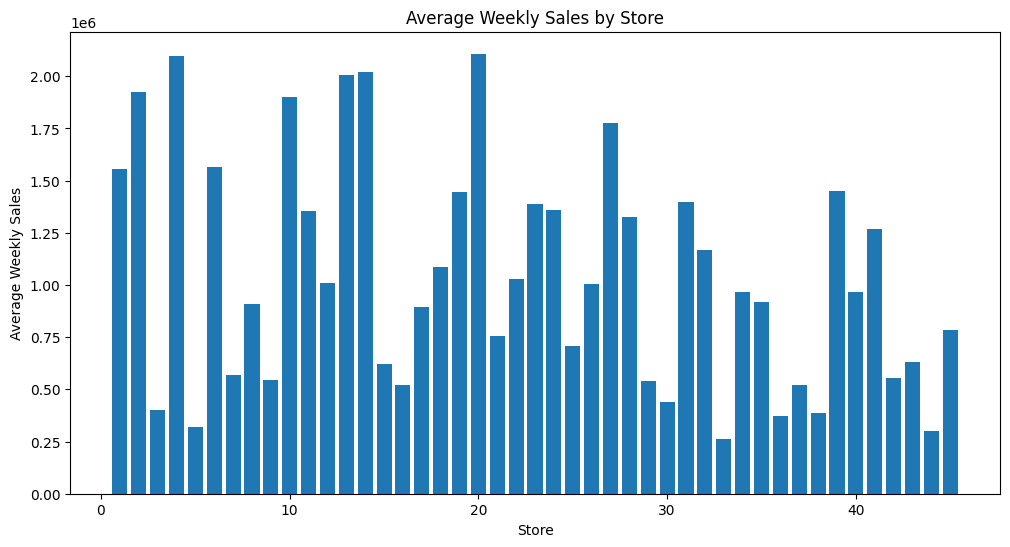

In [15]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
sales_by_store_df = df.groupBy("Store").agg({"Weekly_Sales": "avg"}).orderBy("Store").toPandas()

# Create a bar chart of average weekly sales by store
plt.figure(figsize=(12, 6))
plt.bar(sales_by_store_df["Store"], sales_by_store_df["avg(Weekly_Sales)"])
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales by Store")
plt.show()

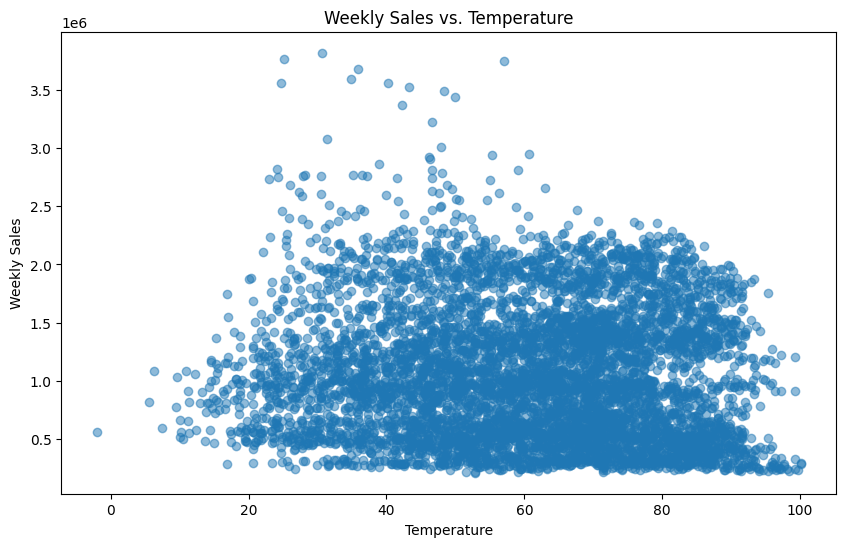

In [16]:
# Create a scatter plot of Weekly Sales vs. Temperature
plt.figure(figsize=(10, 6))
plt.scatter(df.select("Temperature").toPandas(), df.select("Weekly_Sales").toPandas(), alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales vs. Temperature")
plt.show()

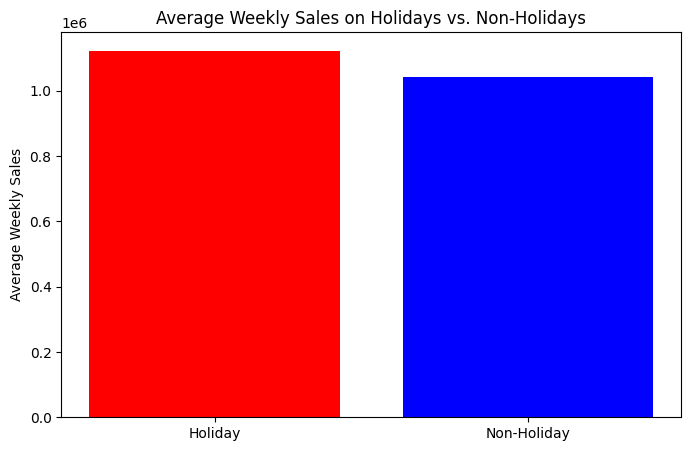

In [17]:
# Calculate average weekly sales for holidays and non-holidays
holiday_sales = df.filter(col("Holiday_Flag") == 1).agg(avg("Weekly_Sales")).collect()[0][0]
non_holiday_sales = df.filter(col("Holiday_Flag") == 0).agg(avg("Weekly_Sales")).collect()[0][0]

# Create a bar chart
labels = ['Holiday', 'Non-Holiday']
averages = [holiday_sales, non_holiday_sales]

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['red', 'blue'])
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales on Holidays vs. Non-Holidays')
plt.show()